In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
import sympy as smp

In [114]:
plt.style.use('seaborn-notebook')

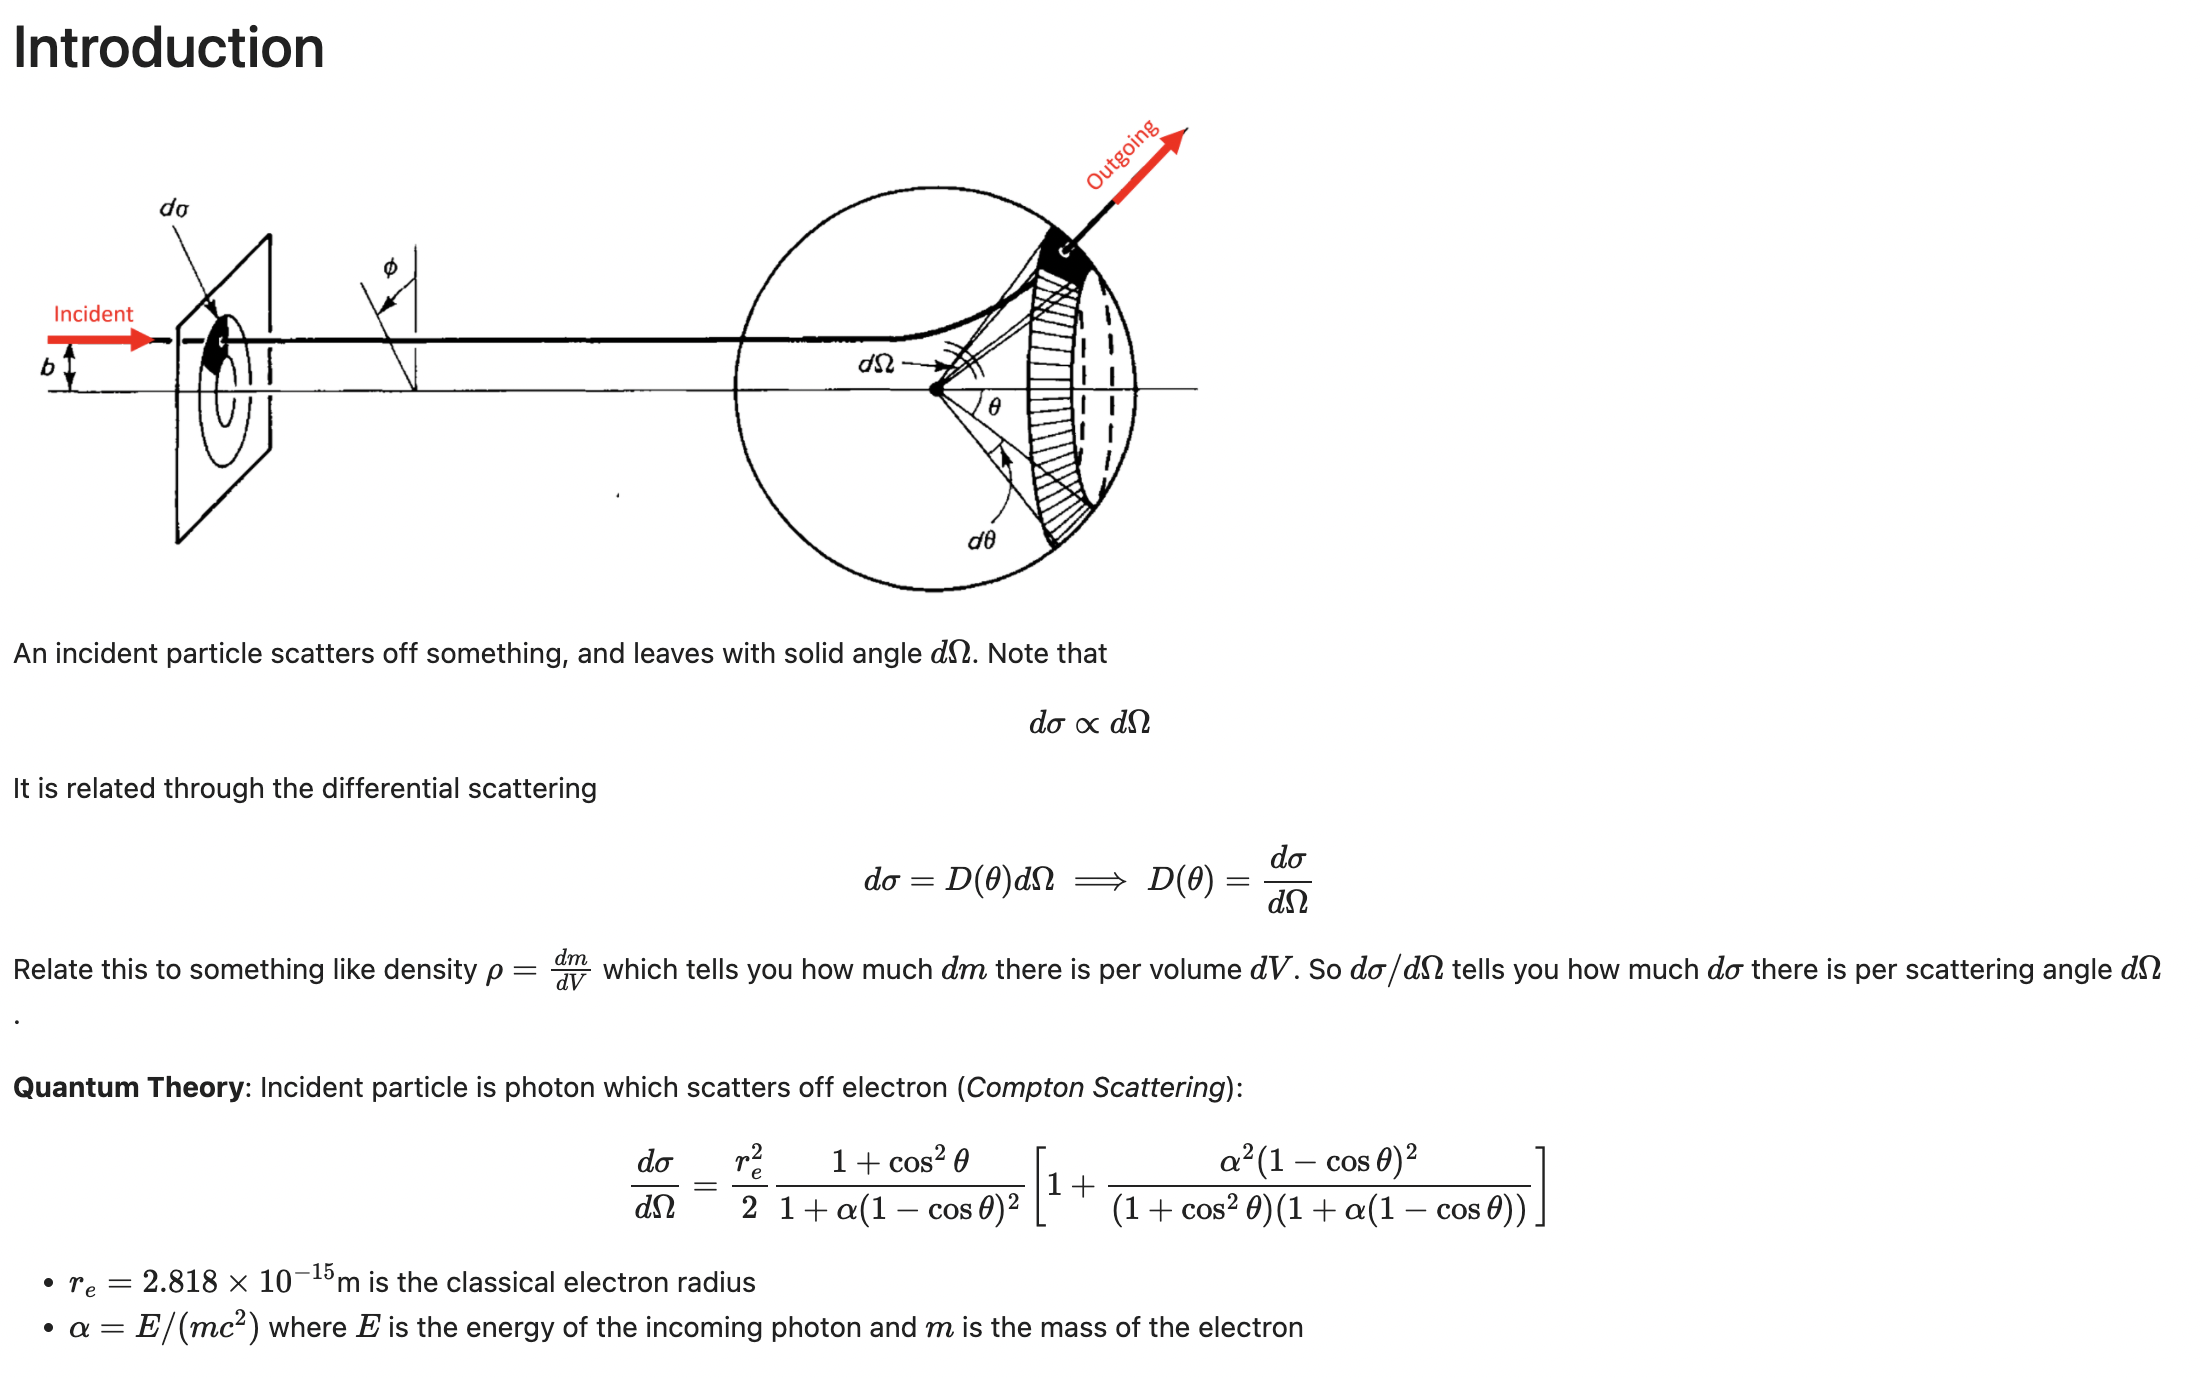

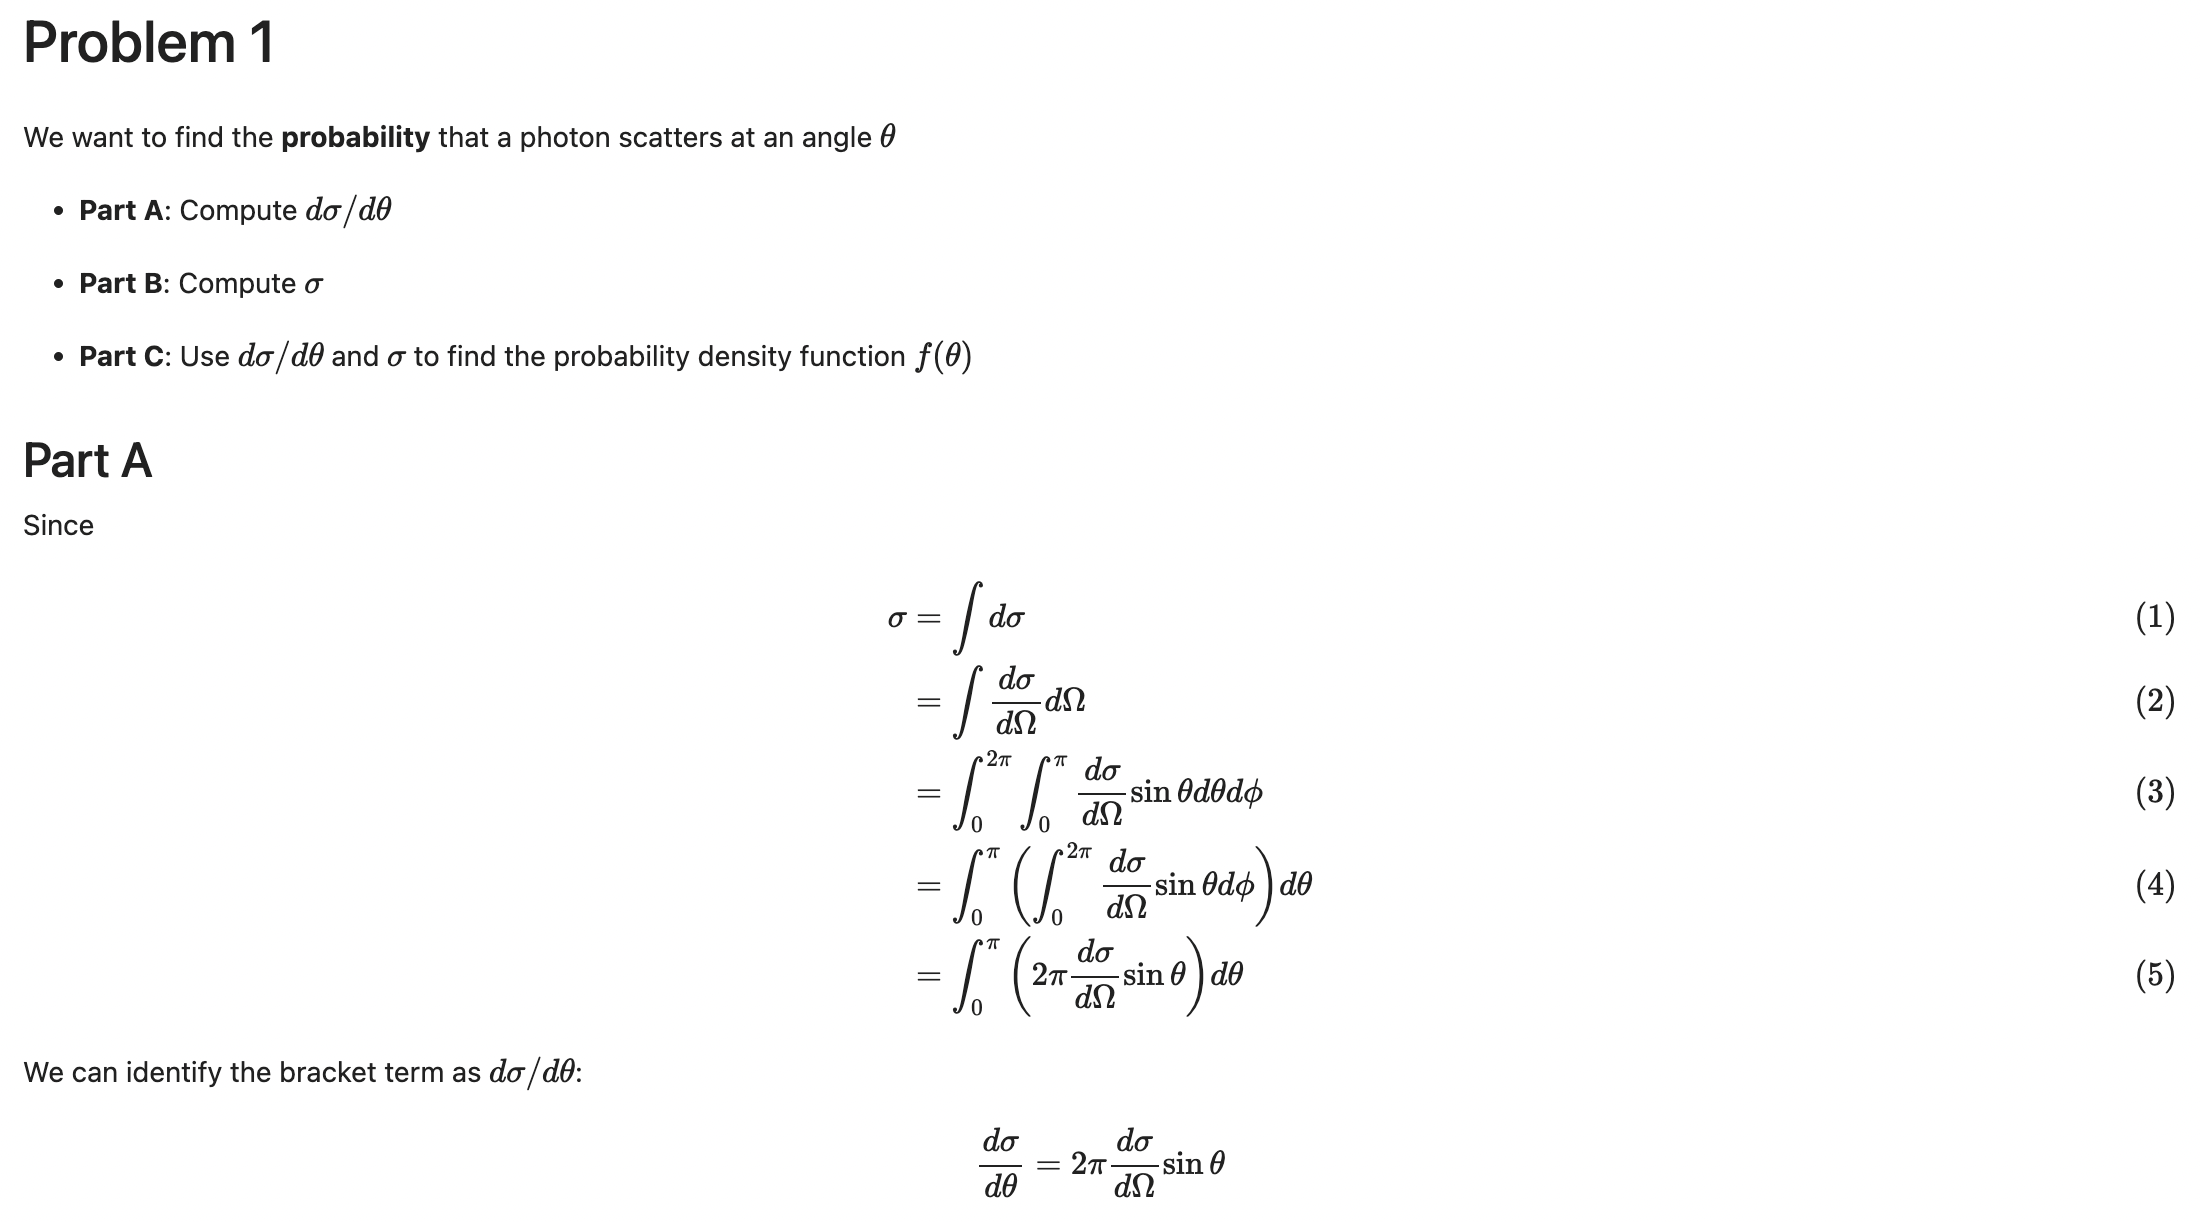



In [115]:
# Let's Define Them
theta, alpha = smp.symbols(r'\theta \alpha', real = True, positive = True)
theta

\theta

In [116]:
alpha

\alpha

In [117]:
dsdo = smp.Rational(1,2)*(1+smp.cos(theta)**2)/(1+alpha*(1-smp.cos(theta)))**2 * \
            ( 1 + alpha**2 * (1-smp.cos(theta))**2 / ((1+smp.cos(theta)**2)*(1+alpha*(1-smp.cos(theta)))))
dsdo
# d(sigma)/d(omega)

(\alpha**2*(1 - cos(\theta))**2/((\alpha*(1 - cos(\theta)) + 1)*(cos(\theta)**2 + 1)) + 1)*(cos(\theta)**2/2 + 1/2)/(\alpha*(1 - cos(\theta)) + 1)**2

In [118]:
dsdt = 2*smp.pi*dsdo*smp.sin(theta)
dsdt = dsdt.simplify()
dsdt
# d(sigma)/d(theta)

pi*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*sin(\theta)/(\alpha*(cos(\theta) - 1) - 1)**3

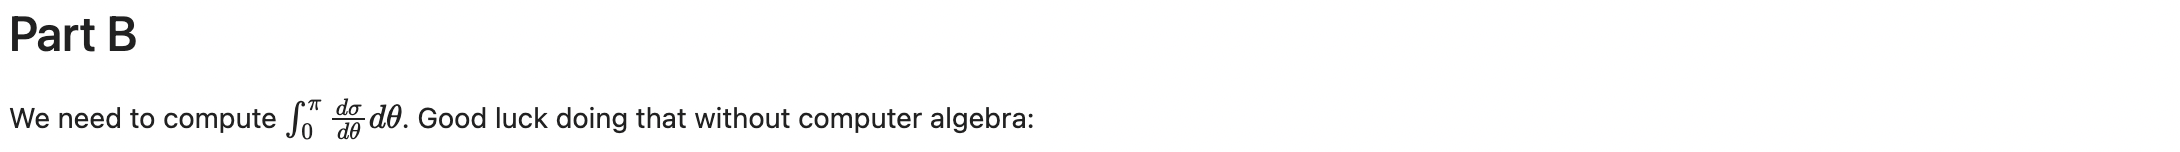

In [119]:
s = smp.integrate(dsdt,(theta,0,smp.pi))
s

-pi*(log(-1/\alpha)/\alpha - 1/(2*\alpha) - 2*log(-1/\alpha)/\alpha**2 - 5/\alpha**2 - 2*log(-1/\alpha)/\alpha**3 - 3/\alpha**3) + pi*(8*\alpha**4*log(-2 - 1/\alpha)/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3) - 8*\alpha**3*log(-2 - 1/\alpha)/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3) - 8*\alpha**3/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3) - 30*\alpha**2*log(-2 - 1/\alpha)/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3) - 33*\alpha**2/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3) - 20*\alpha*log(-2 - 1/\alpha)/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3) - 26*\alpha/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3) - 4*log(-2 - 1/\alpha)/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3) - 6/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3))

In [120]:
s = s.simplify()
s

pi*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha + log((2*\alpha + 1)**(4*\alpha**4 - 4*\alpha**3 - 15*\alpha**2 - 10*\alpha - 2)))/(\alpha**3*(4*\alpha**2 + 4*\alpha + 1))

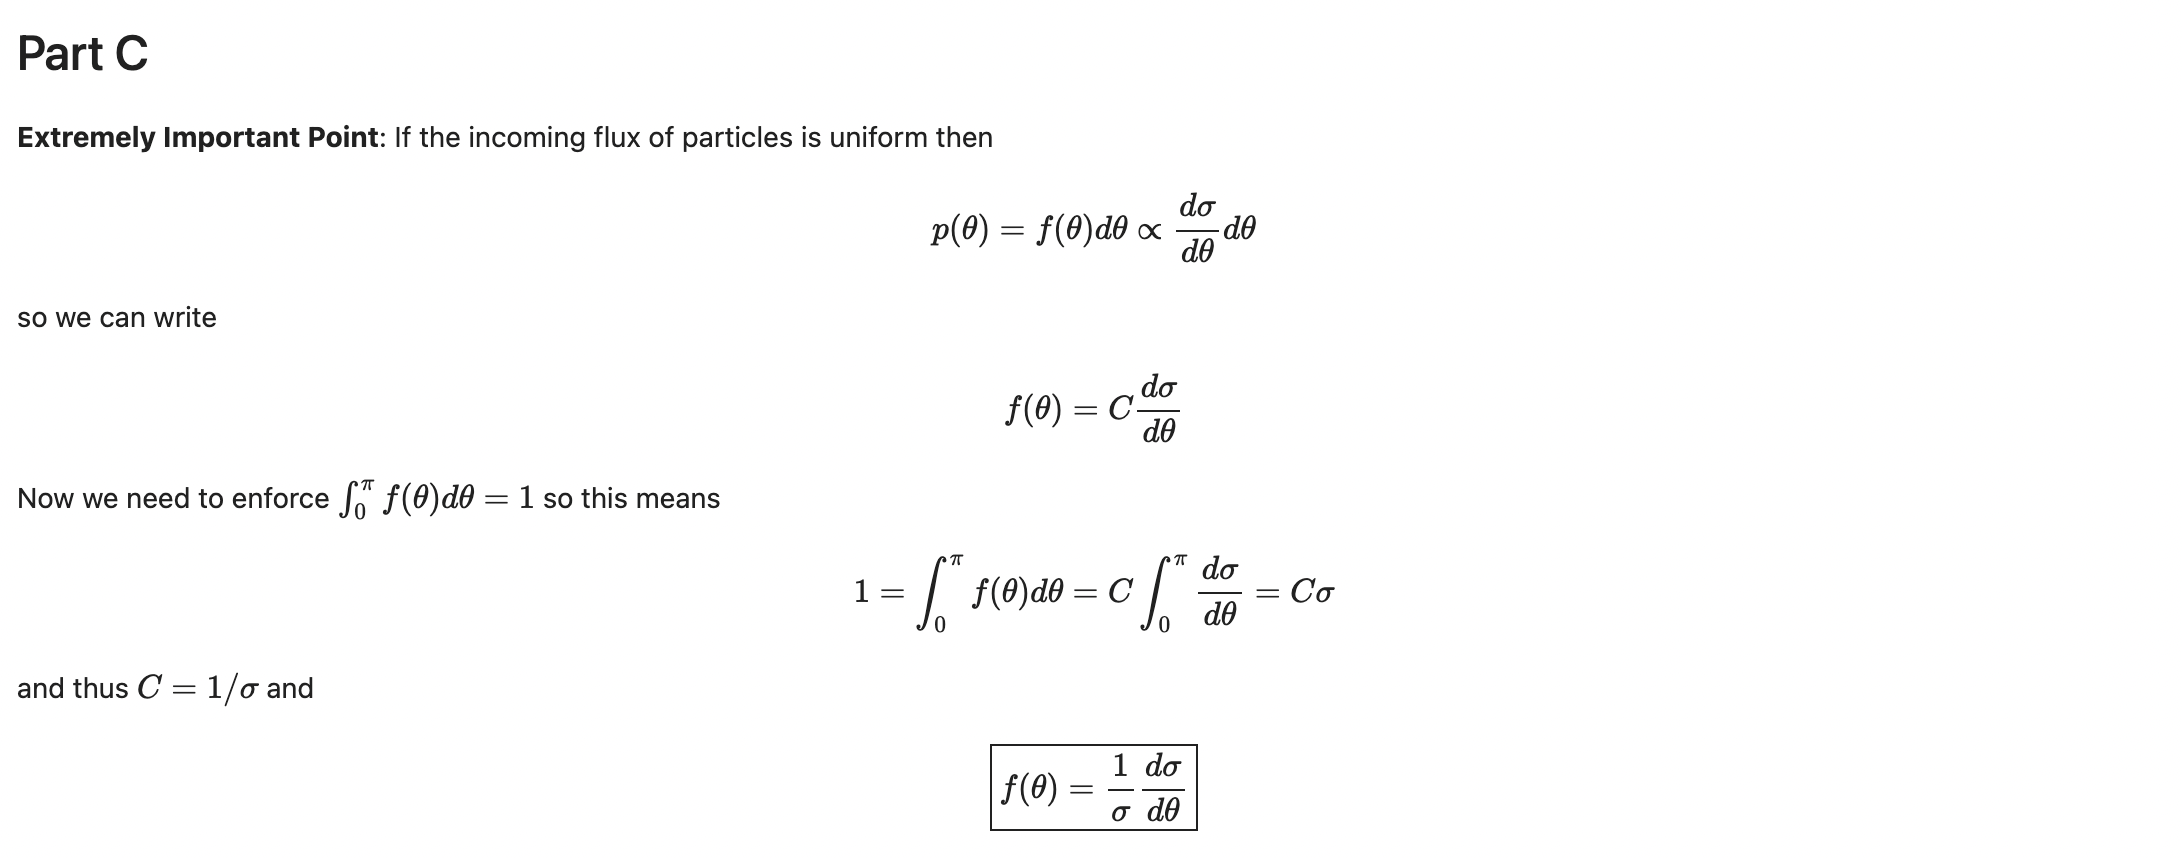

In [121]:
dsdt/s

\alpha**3*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)*sin(\theta)/((\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha + log((2*\alpha + 1)**(4*\alpha**4 - 4*\alpha**3 - 15*\alpha**2 - 10*\alpha - 2))))

In [122]:
pbf_theta = (dsdt/s).simplify()
pbf_theta

-\alpha**3*(\alpha**2*(cos(\theta) - 1)**2 - (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)*sin(\theta)/((\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

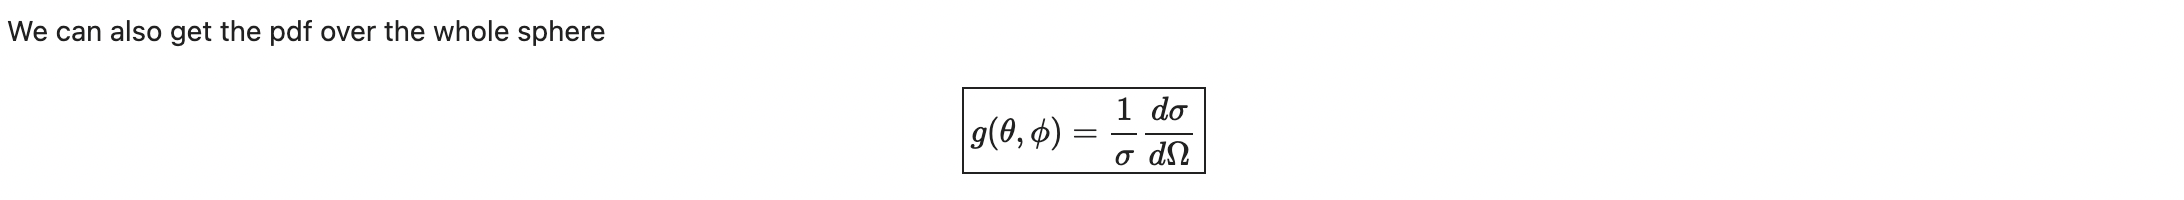

In [123]:
pbf_omega = (dsdo/s).simplify()
pbf_omega
# MORE LIKELY TO BE ON EQUATOR THAN ON POLES

\alpha**3*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)/(2*pi*(\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha + (4*\alpha**4 - 4*\alpha**3 - 15*\alpha**2 - 10*\alpha - 2)*log(2*\alpha + 1)))

In [124]:
# Lets make some plots. First lets turn the pbf into a numerical function
pbf_theta_f = smp.lambdify([theta,alpha], pbf_theta)
pbf_omega_f = smp.lambdify([theta,alpha], pbf_omega)

In [125]:
pbf_omega_f(np.pi/2,1)

0.051961265779313724

__Lets do a simple plot for α=3__


In [126]:
the = np.linspace(0,2*np.pi, 1000)
pbf_t = pbf_theta_f(the, 3)
pbf_o = pbf_omega_f(the, 3)

Use __A polar plot where the angle represents the polar angle θ and the radius represents the probaility density function__

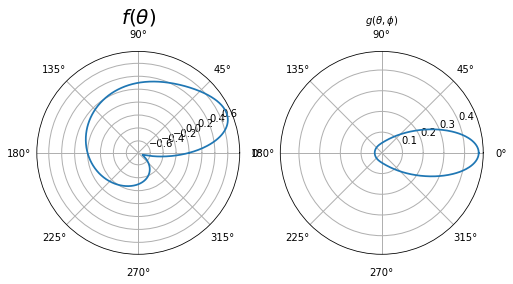

In [127]:
fig, axes = plt.subplots(1,2,subplot_kw={'projection': 'polar'})
axes[0].plot(the, pbf_t)
axes[0].set_title(r'$f(\theta)$', fontsize=20)
axes[1].plot(the, pbf_o)
axes[1].set_title(r'$g(\theta, \phi)$', fontsize=10)
plt.show()

In [128]:
# FOR aplha = 0.2
the = np.linspace(0,2*np.pi, 1000)
pbf_t = pbf_theta_f(the, 0.2)
pbf_o = pbf_omega_f(the, 0.2)

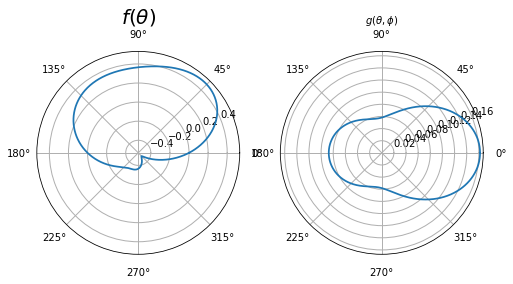

In [129]:
fig, axes = plt.subplots(1,2,subplot_kw={'projection': 'polar'})
axes[0].plot(the, pbf_t)
axes[0].set_title(r'$f(\theta)$', fontsize=20)
axes[1].plot(the, pbf_o)
axes[1].set_title(r'$g(\theta, \phi)$', fontsize=10)
plt.show()

In [130]:
# FOR aplha = 10
the = np.linspace(0,2*np.pi, 1000)
pbf_t = pbf_theta_f(the, 10)
pbf_o = pbf_omega_f(the, 10)

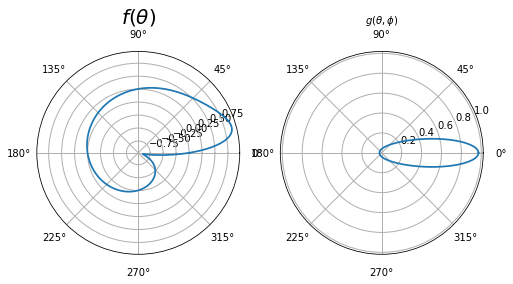

In [131]:
fig, axes = plt.subplots(1,2,subplot_kw={'projection': 'polar'})
axes[0].plot(the, pbf_t)
axes[0].set_title(r'$f(\theta)$', fontsize=20)
axes[1].plot(the, pbf_o)
axes[1].set_title(r'$g(\theta, \phi)$', fontsize=10)
plt.show()

__With increasing value of aplha the curve gets flatter and moves towards the centre__

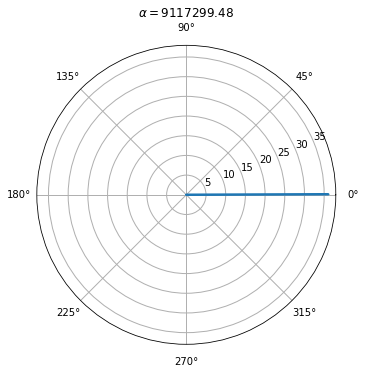

In [132]:
# Get interval of θ from 0 to π and some different values of α=E/m to make an animation
theta = np.linspace(0,np.pi, 1000)
alphas = 10.0** np.linspace(-5,7,300)
pbfs = [pbf_theta_f(theta, alpha) for alpha in alphas]

#Make an animation

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ln, = plt.plot([], [])

def animate(i):
    ax.clear()
    ax.plot(theta, pbfs[i])
    ax.set_title(r'$\alpha=$'+f'{alphas[i]:.2f}')
    
ani = animation.FuncAnimation(fig, animate, frames=299, interval=50)
ani.save('scattering01.gif',writer='pillow',fps=30,dpi=100)

__THE more energetic the photon the least it scatters__

## After Collosion Anyalysis

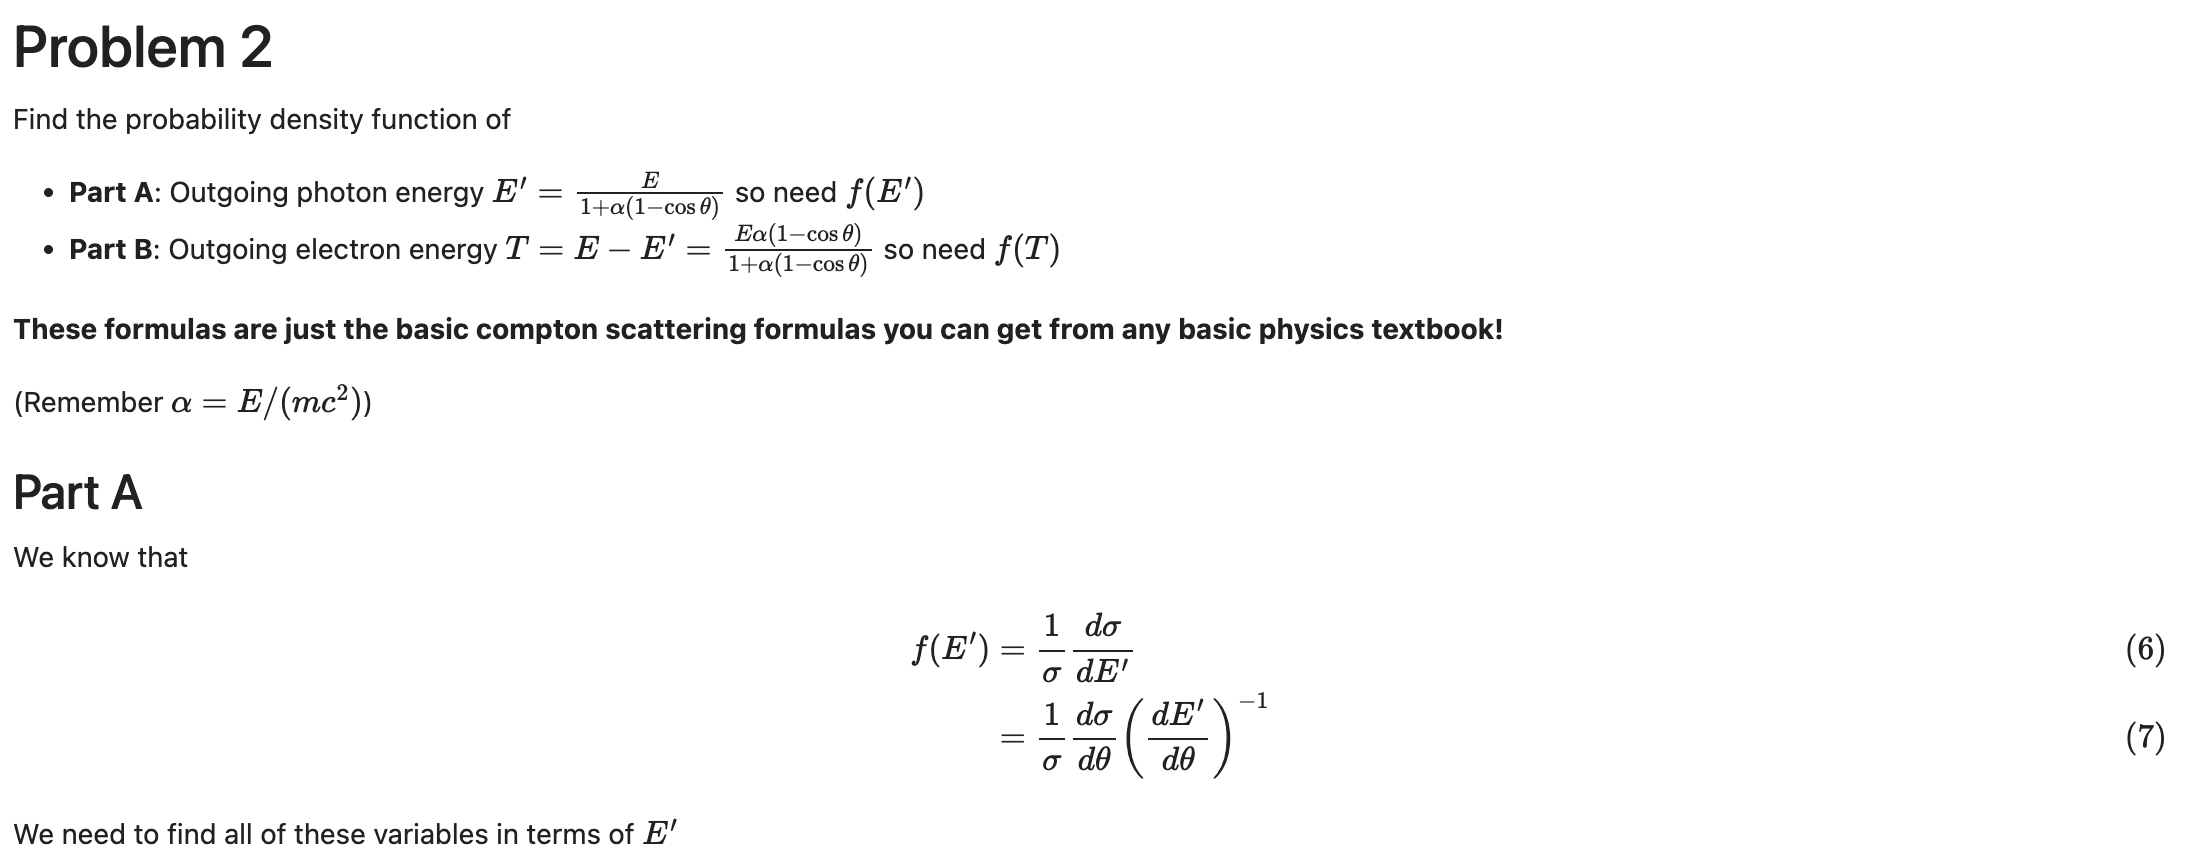

In [133]:
# let's define them
E, Ep, alpha, T, theta = smp.symbols(r"E E' \alpha T \theta", real=True, positive=True)
Ep # E prime

E'

In [134]:
# Get expression for Ep in terms of other variables
Ep_expr = E/(1+alpha*(1-smp.cos(theta)))
Ep_expr # as described above

E/(\alpha*(1 - cos(\theta)) + 1)

In [135]:
Ep - Ep_expr

-E/(\alpha*(1 - cos(\theta)) + 1) + E'

In [136]:
# To get θ(E′) (which we need to plug into the expression above), we need to solve Ep=Ep_expr
theta_expr = smp.solve(Ep - Ep_expr, theta)
theta_expr

[-acos((-E + E'*\alpha + E')/(E'*\alpha)) + 2*pi,
 acos((-E + E'*\alpha + E')/(E'*\alpha))]

In [137]:
theta_expr = smp.solve(Ep - Ep_expr, theta)[0]
theta_expr

-acos((-E + E'*\alpha + E')/(E'*\alpha)) + 2*pi

In [138]:
theta_expr = smp.solve(Ep - Ep_expr, theta)[1] # using this one for further calculations
theta_expr

acos((-E + E'*\alpha + E')/(E'*\alpha))

In [139]:
pbf_Ep = 1/s * dsdt / smp.diff(Ep_expr, theta)
pbf_Ep

-\alpha**2*(\alpha*(1 - cos(\theta)) + 1)**2*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)/(E*(\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha + log((2*\alpha + 1)**(4*\alpha**4 - 4*\alpha**3 - 15*\alpha**2 - 10*\alpha - 2))))

In [140]:
# substrituting theta function with Ep function
pbf_Ep = pbf_Ep.subs(theta, theta_expr).simplify()
pbf_Ep

-(E*(E'**2*\alpha**2 + (-E + E'*\alpha + E')**2) + E'*\alpha**2*(E - E')**2)*(4*\alpha**2 + 4*\alpha + 1)/(E**2*E'**2*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

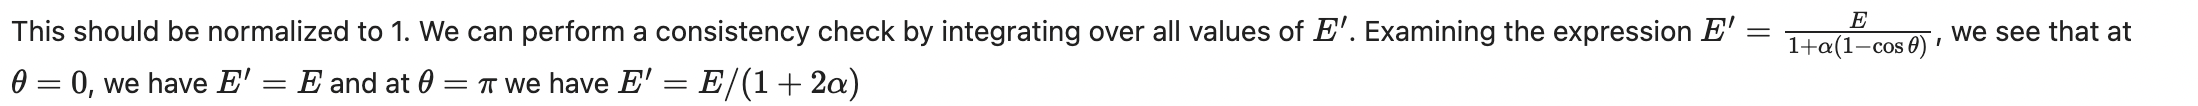

In [141]:
smp.integrate(pbf_Ep, (Ep, E, E/(1+2*alpha))).simplify()

1

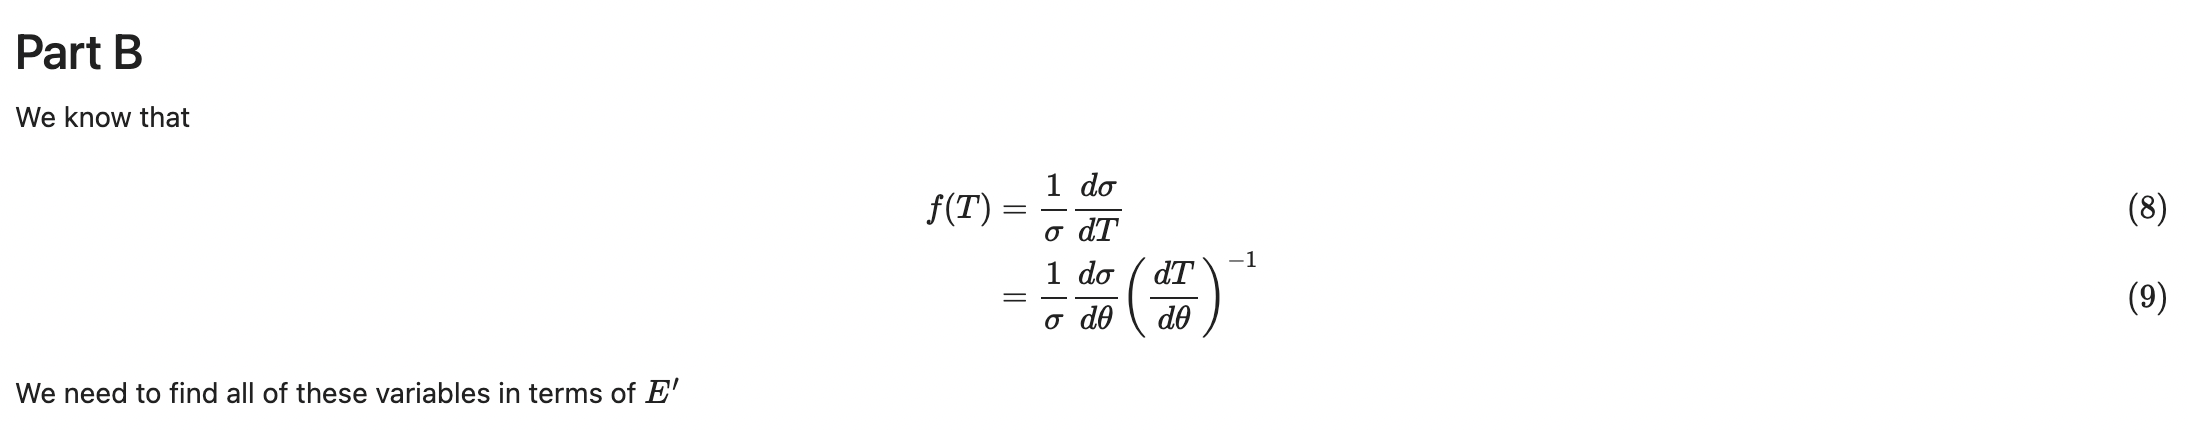

In [142]:
# Again,
T_expr = E*alpha*(1-smp.cos(theta))/(1+alpha*(1-smp.cos(theta)))
theta_expr = smp.solve(T-T_expr, theta)[1]
pbf_T = 1/s * dsdt / smp.diff(T_expr, theta)
pbf_T = pbf_T.subs(theta, theta_expr).simplify()
pbf_T

(\alpha**2*(E - T)*(-E*\alpha + T*\alpha + T + \alpha*(E - T))**2 - (\alpha**2*(E - T)**2 + (-E*\alpha + T*\alpha + T)**2)*(E*\alpha - E - T*\alpha - \alpha*(E - T)))*(4*\alpha**2 + 4*\alpha + 1)/(E*(-E + T)**2*(-E*\alpha + E + T*\alpha + \alpha*(E - T))*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha + (4*\alpha**4 - 4*\alpha**3 - 15*\alpha**2 - 10*\alpha - 2)*log(2*\alpha + 1)))

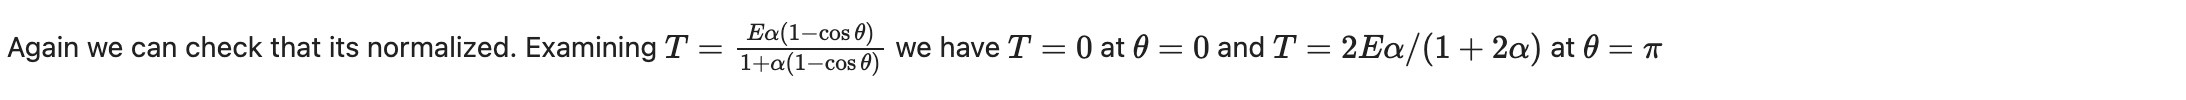

In [143]:
smp.integrate(pbf_T, (T, 0, 2*E*alpha/(1+2*alpha))).simplify()

1

In [144]:
# Animation; Lets see what happens to these pdfs as α (ratio of incoming particle energy and mc^2 ) changes---->
pbf_Ep_f = smp.lambdify([Ep, E, alpha], pbf_Ep)
pbf_T_f = smp.lambdify([T, E, alpha], pbf_T)

In [156]:
#Plot for sample value 
m = 0.689
alpha = 300 # incoming photon is 300 times more em=nergetic them rest mass electron
E = alpha*m
Ep = np.linspace(E/(1+2*alpha), E, 1000) # Boundry Conditions
T = np.linspace(0, 2*E*alpha/(1+2*alpha), 1000)

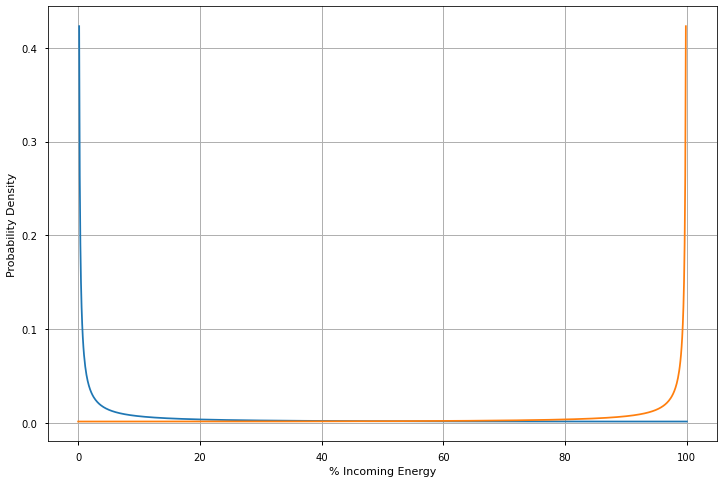

In [157]:
plt.figure(figsize=(12,8))
plt.plot(100*Ep/(E),-pbf_Ep_f(Ep, E, alpha)) # outgoing Photon
plt.plot(100*T/(E),pbf_T_f(T, E, alpha)) # outgoing electron
plt.xlabel('% Incoming Energy')
plt.ylabel('Probability Density')
#plt.legend(ncol=1, fontsize=10, facecolor='white', framealpha=1, frameon=True, loc='upper center')
plt.grid()
plt.savefig('pbfalpha_300.png', dpi=200)

In [158]:
# alpha = 3
m = 0.689
alpha = 3 
E = alpha*m
Ep = np.linspace(E/(1+2*alpha), E, 1000) # Boundry Conditions
T = np.linspace(0, 2*E*alpha/(1+2*alpha), 1000)

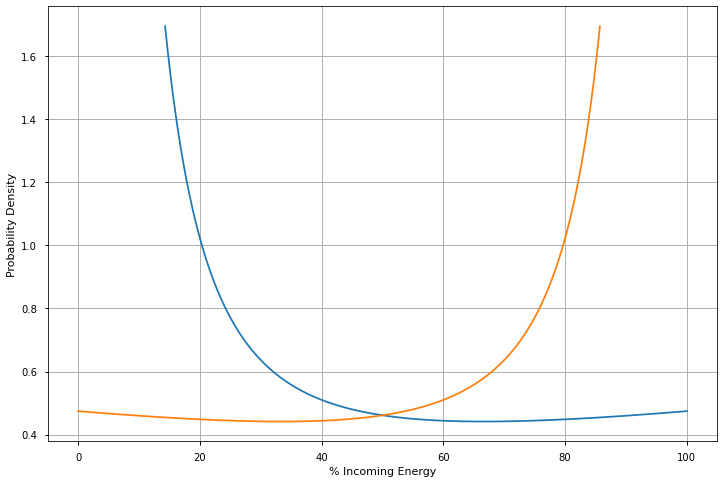

In [159]:
plt.figure(figsize=(12,8))
plt.plot(100*Ep/(E), -pbf_Ep_f(Ep, E, alpha), label='Outgoing Photon')
plt.plot(100*T/(E), pbf_T_f(T, E, alpha), label='Outgoing Electron')
plt.xlabel('% Incoming Energy')
plt.ylabel('Probability Density')
#plt.legend(ncol=1, fontsize=10, facecolor='white', framealpha=1, frameon=True, loc='upper center')
plt.grid()
plt.savefig('pbfalpha_3.0.png', dpi=200)

In [160]:
# alpha = 1
m = 0.689
alpha = 1
E = alpha*m
Ep = np.linspace(E/(1+2*alpha), E, 1000) # Boundry Conditions
T = np.linspace(0, 2*E*alpha/(1+2*alpha), 1000)

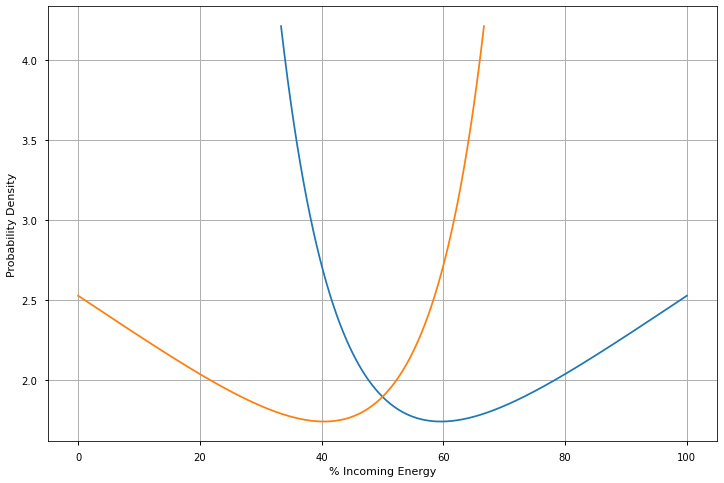

In [162]:
plt.figure(figsize=(12,8))
plt.plot(100*Ep/(E), -pbf_Ep_f(Ep, E, alpha))
plt.plot(100*T/(E), pbf_T_f(T, E, alpha))
plt.xlabel('% Incoming Energy')
plt.ylabel('Probability Density')
#plt.legend(ncol=1, fontsize=10, facecolor='white', framealpha=1, frameon=True, loc='upper center')
plt.grid()
plt.savefig('pbfalpha_3.0.png', dpi=200)

In [165]:
# alpha = 0.011
m = 0.689
alpha = 0.011 # incoming photon is 300 times more em=nergetic them rest mass electron
E = alpha*m
Ep = np.linspace(E/(1+2*alpha), E, 1000) # Boundry Conditions
T = np.linspace(0, 2*E*alpha/(1+2*alpha), 1000)

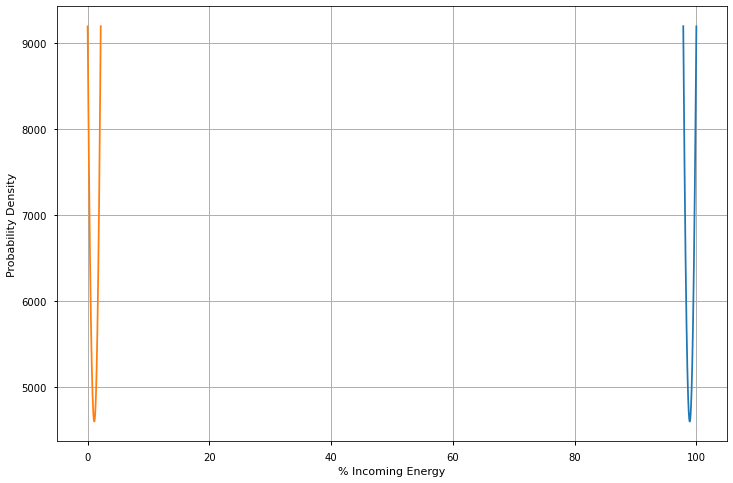

In [166]:
plt.figure(figsize=(12,8))
plt.plot(100*Ep/(E), -pbf_Ep_f(Ep, E, alpha))
plt.plot(100*T/(E), pbf_T_f(T, E, alpha))
plt.xlabel('% Incoming Energy')
plt.ylabel('Probability Density')
#plt.legend(ncol=1, fontsize=10, facecolor='white', framealpha=1, frameon=True, loc='upper center')
plt.grid()
plt.savefig('pbfalpha_0.011.0.png', dpi=200)
# Both the particle keep their energies

## With increasing value of alpha the curves gets steeper and steeper

In [169]:
alphas = 10.0** np.linspace(-3,7,300)
Eps = [np.linspace(alpha*m/(1+2*alpha), alpha*m, 1000) for alpha in alphas]
Ts = [np.linspace(0, 2*alpha*m*alpha/(1+2*alpha), 1000) for alpha in alphas]
pbfs_Ep = [-pbf_Ep_f(Ep, alpha*m, alpha) for (alpha, Ep) in zip(alphas, Eps)]
pbfs_T = [pbf_T_f(T, alpha*m, alpha) for (alpha, T) in zip(alphas, Ts)]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

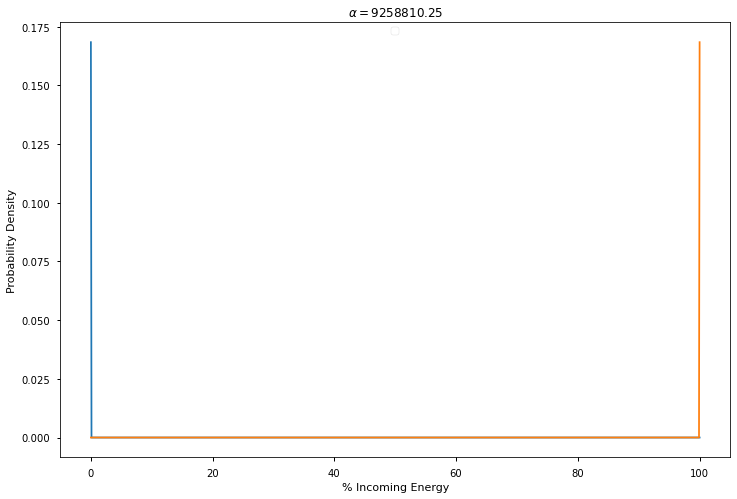

In [173]:
# Create animation

fig, ax = plt.subplots(figsize=(12,8))

def animate(i):
    alpha = alphas[i]; Ep=Eps[i]; T = Ts[i]
    E = m*alpha
    ax.clear()
    ax.plot(100*Ep/E, -pbf_Ep_f(Ep, E, alpha))
    ax.plot(100*T/E, pbf_T_f(T, E, alpha))
    ax.set_xlabel('% Incoming Energy')
    ax.set_ylabel('Probability Density')
    ax.legend(ncol=1, fontsize=10, facecolor='white', framealpha=1, frameon=True, loc='upper center')
    ax.set_title(r'$\alpha=$'+f'{alpha:.2f}')
    
ani = animation.FuncAnimation(fig, animate, frames=299, interval=50)
ani.save('scattering4.gif',writer='pillow',fps=30,dpi=100)

In [174]:
print("Thank You, Universe.JAI_Shree_RAM")

Thank You, Universe.JAI_Shree_RAM
